In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
single_image = x_train[0]

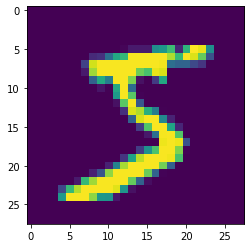

In [6]:
plt.imshow(single_image)

In [7]:
y_train[0]

5

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
y_cat_train = to_categorical(y_train, num_classes=10)

In [10]:
y_cat_test = to_categorical(y_test, num_classes=10)

In [11]:
single_image.max()

255

In [12]:
single_image.min()

0

In [13]:
x_train = x_train/255
x_test = x_test/255

In [14]:
scaled_image = x_train[0]

In [15]:
scaled_image.max()

1.0

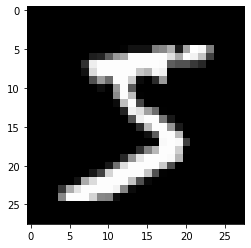

In [17]:
plt.imshow(scaled_image, cmap='gray')

In [18]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [20]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), ))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])


from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=1)

model.fit(x_train, y_cat_train, epochs=10, validation_data =(x_test, y_cat_test),
         callbacks=[early_stop])



Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 39s 657us/sample - loss: 0.1341 - accuracy: 0.9599 - val_loss: 0.0525 - val_accuracy: 0.9833
Epoch 2/10
60000/60000 [==============================] - 36s 603us/sample - loss: 0.0454 - accuracy: 0.9853 - val_loss: 0.0396 - val_accuracy: 0.9868- loss: 0.0454 - accuracy: 
Epoch 3/10
60000/60000 [==============================] - 36s 607us/sample - loss: 0.0293 - accuracy: 0.9910 - val_loss: 0.0412 - val_accuracy: 0.9867


In [21]:
metrics = pd.DataFrame(model.history.history)

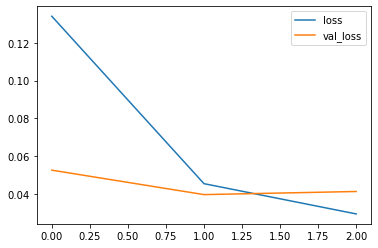

In [22]:
metrics[['loss', 'val_loss']].plot()

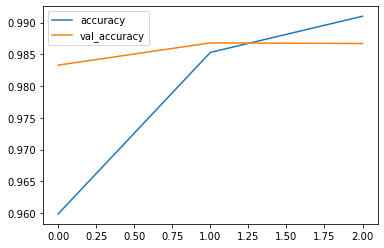

In [23]:
metrics[['accuracy', 'val_accuracy']].plot()

In [24]:
from sklearn.metrics import classification_report

In [25]:
predictions = model.predict_classes(x_test)

In [26]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.98      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.96      1.00      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [27]:
my_number = x_test[0] 

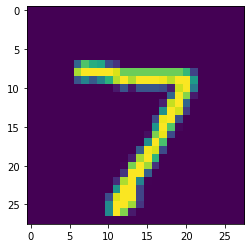

In [29]:
plt.imshow(my_number.reshape(28, 28))

In [30]:
model.predict_classes(my_number.reshape(1, 28, 28, 1))

array([7], dtype=int64)